1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [122]:
def knn(x_train, y_train, x_test, k):
    q = 0.8

    answers = []
    for x in x_test:
        weighted_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])

            weight = q**i
            weighted_distance = weight * distance

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            weighted_distances.append((weighted_distance, y_train[i]))
            
            
        # создаем словарь со всеми возможными классами
        classes= {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(weighted_distances)[0:k]:
            classes[d[1]] += 1
        print(classes)    
        
        print(sorted(classes, key=classes.get)[-1])    
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [123]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [124]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

{0: 1, 1: 0, 2: 1}
2
{0: 1, 1: 1, 2: 0}
1
{0: 0, 1: 0, 2: 2}
2
{0: 1, 1: 0, 2: 1}
2
{0: 1, 1: 0, 2: 1}
2
{0: 0, 1: 0, 2: 2}
2
{0: 0, 1: 1, 2: 1}
2
{0: 2, 1: 0, 2: 0}
0
{0: 2, 1: 0, 2: 0}
0
{0: 0, 1: 0, 2: 2}
2
{0: 0, 1: 2, 2: 0}
1
{0: 1, 1: 0, 2: 1}
2
{0: 0, 1: 0, 2: 2}
2
{0: 0, 1: 0, 2: 2}
2
{0: 0, 1: 1, 2: 1}
2
{0: 1, 1: 0, 2: 1}
2
{0: 0, 1: 2, 2: 0}
1
{0: 1, 1: 1, 2: 0}
1
{0: 2, 1: 0, 2: 0}
0
{0: 2, 1: 0, 2: 0}
0
{0: 1, 1: 1, 2: 0}
1
{0: 1, 1: 1, 2: 0}
1
{0: 0, 1: 0, 2: 2}
2
{0: 2, 1: 0, 2: 0}
0
{0: 0, 1: 0, 2: 2}
2
{0: 0, 1: 2, 2: 0}
1
{0: 1, 1: 0, 2: 1}
2
{0: 2, 1: 0, 2: 0}
0
{0: 0, 1: 1, 2: 1}
2
{0: 0, 1: 1, 2: 1}
2
Точность алгоритма при k = 2: 0.633


2*. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [127]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

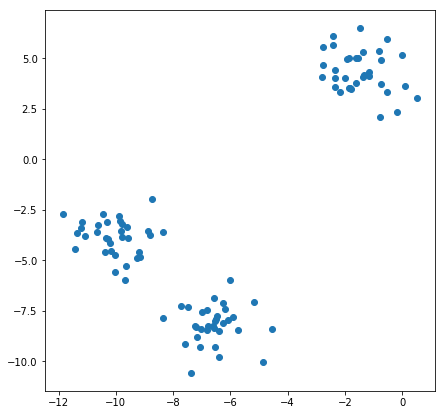

In [128]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [129]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [130]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [131]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

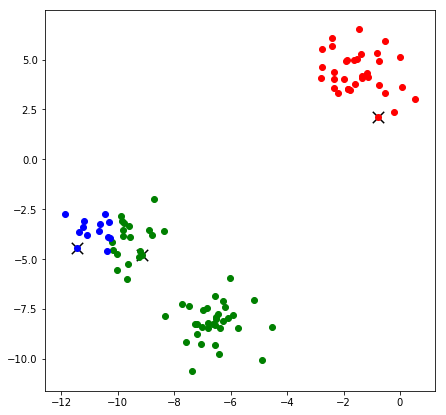

In [132]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

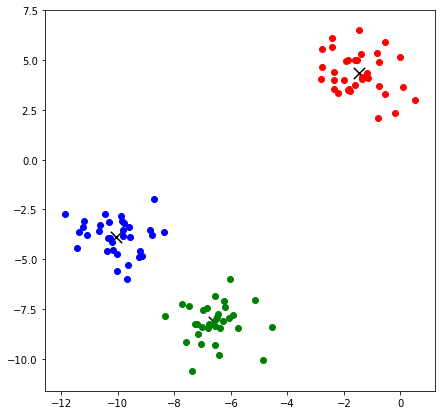

In [133]:
max_iterations = 10

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

Cреднее квадратичное внутрикластерное расстояние:

$$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$


In [164]:
def mean_squared_distance(clusters,centroids):
    mean_distances = []
    for cluster, data in clusters.items():
        dist_squares = []
        for i in data:
            distance = e_metrics(i, centroids[cluster]) # вычислим расстояние от каждого объекта до центроида
            dist_squares.append(distance**2)
        mean_distance = np.mean(dist_squares)
        mean_distances.append(mean_distance) # вычислим среднее квадратов расстояний по каждому из кластеров
    mean_squared_distance = sum(mean_distances) # просуммируем средние по кластерам
    return mean_squared_distance

In [165]:
mean_squared_distance(clusters,centroids)

4.682216258738468